In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#To Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the excel file....
df=pd.read_excel('electricalenergy.xlsx')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


# Data Exploration (exploratory data analysis or EDA)

In [4]:
#Display The head ==> To Check if Data is Properly Imported
df.head(10)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


In [5]:
#To check the shape of the dataset
df.shape # (rows, columns)

(9568, 5)

In [6]:
#features
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [7]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.9 KB


In [9]:
# check for duplicates
print('sum of duplicated values{}\n'.format(df.duplicated().sum()))

sum of duplicated values41



In [10]:
#drop duplictes values
df.drop_duplicates()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [11]:
# Are there any missing values?
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [12]:
#Lets describe the dataset
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [13]:
#number of unique value in each features
for col in df.columns.values:
    print("number of unique valuse of {} : {}".format(col, df[col].nunique()))

number of unique valuse of AT : 2773
number of unique valuse of V : 634
number of unique valuse of AP : 2517
number of unique valuse of RH : 4546
number of unique valuse of PE : 4836


# Univariate  Analysis


(array([ 152., 1206., 1812., 1456., 1010., 1061., 1150.,  967.,  595.,
         159.]),
 array([420.26, 427.81, 435.36, 442.91, 450.46, 458.01, 465.56, 473.11,
        480.66, 488.21, 495.76]),
 <a list of 10 Patch objects>)

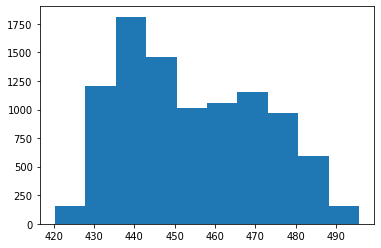

In [14]:
#Analyze output variable
plt.hist((df.PE))

Most of the dataset's samples fall between 427 and 487 of 'PE' output class and it right skew.

AT        AxesSubplot(0.125,0.71587;0.227941x0.16413)
V      AxesSubplot(0.398529,0.71587;0.227941x0.16413)
AP     AxesSubplot(0.672059,0.71587;0.227941x0.16413)
RH       AxesSubplot(0.125,0.518913;0.227941x0.16413)
PE    AxesSubplot(0.398529,0.518913;0.227941x0.16413)
dtype: object

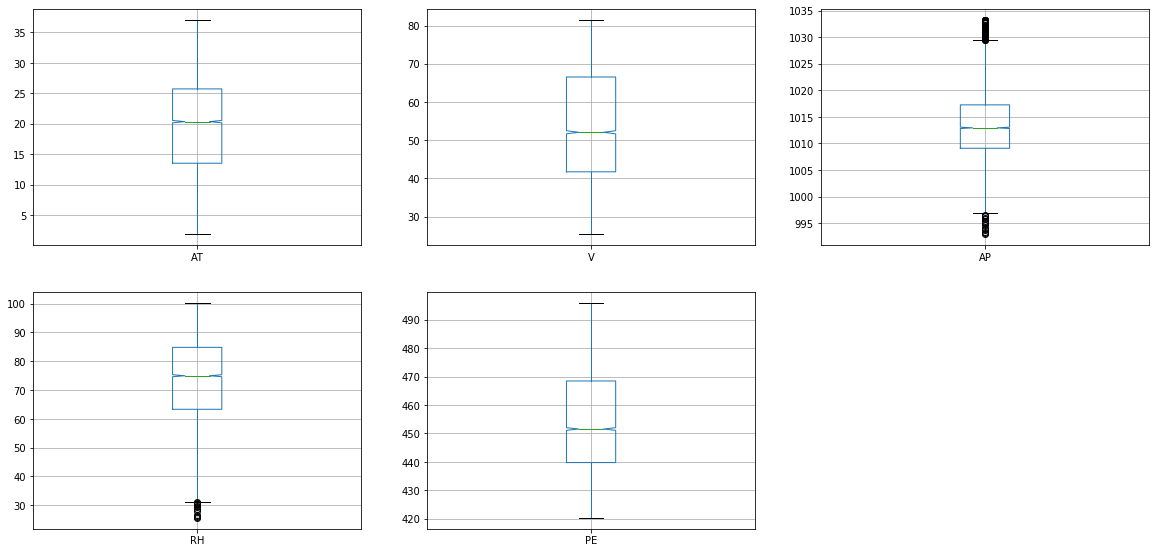

In [17]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(4,3),figsize=(20,20),grid=True,notch=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A146F0DB08>,
      dtype=object)

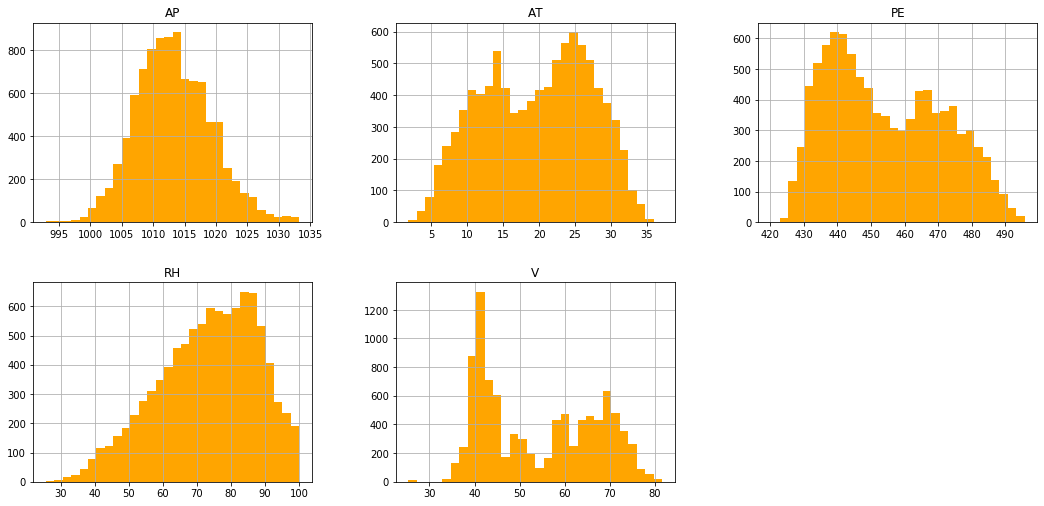

In [18]:
#plotting histograms for checking normal distribution
df.hist(figsize=(18,18),grid=True,layout=(4,3),bins=30,color='orange')

# Bivariate  Analysis


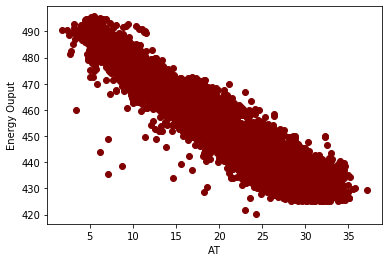

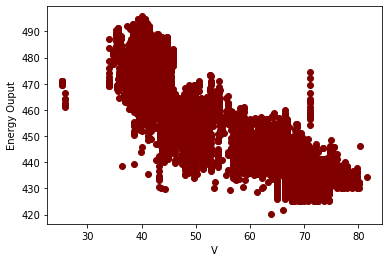

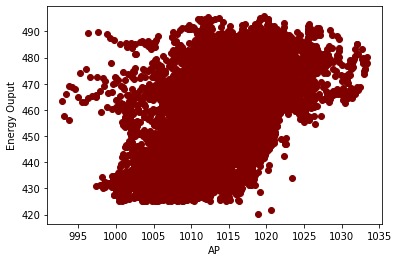

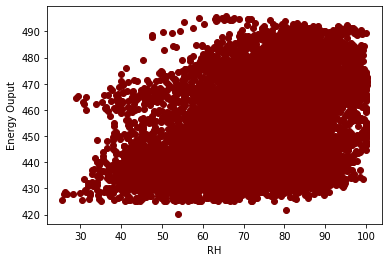

In [32]:
 #Plotting the columns against the Energy Output.

for col in df.columns[:len(df.columns)-1]:
    plt.scatter(df[col], df["PE"], color="maroon")
    plt.ylabel("Energy Ouput")
    plt.xlabel(col)
    plt.show()

Conclusion:
1) As Ambient Pressure increases the Output Energy also increses.
2) Increasing in the Temprature will drastically reduse Energy Output.
3) Incresing the Exhaust Vaccum level will leads to decrease the output Power.
4) Incresing Relative Humidity will have a positive effect on Power Output.
5)there is an approximately linear relationship between PE and the negative of AT
6)there is an approximately linear relationship between PE and negative of V

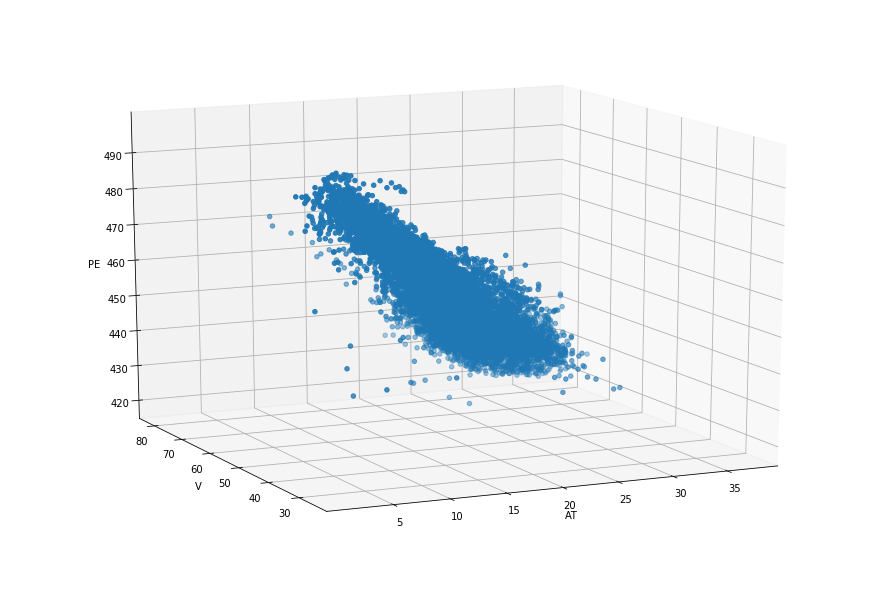

In [28]:
#We can also generate a 3D plot of the observations, which can sometimes help to interpret the data more easily.
#Here we plot PE as a function of AT and V
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)
ax.scatter(df["AT"], df["V"], df["PE"])
ax.set_xlabel("AT")
ax.set_ylabel("V")
ax.set_zlabel("PE")
ax.set_facecolor("white")

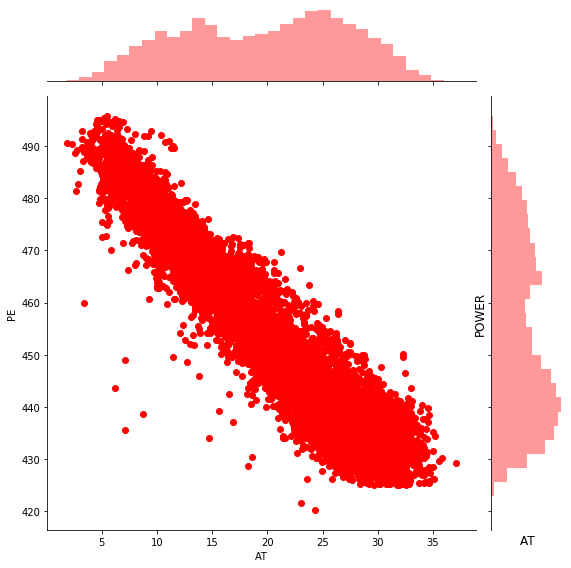

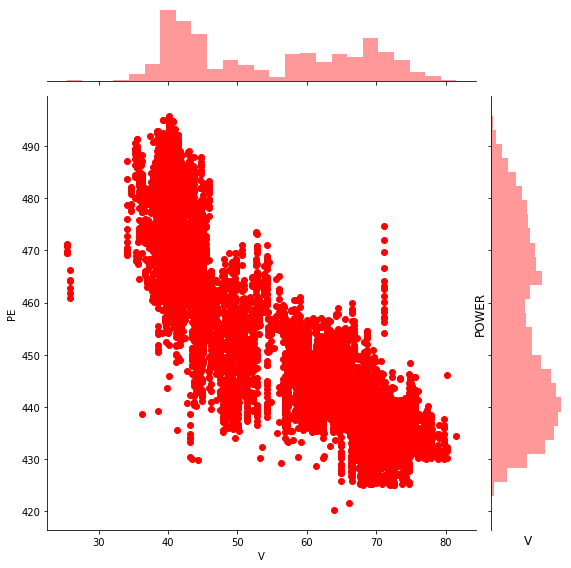

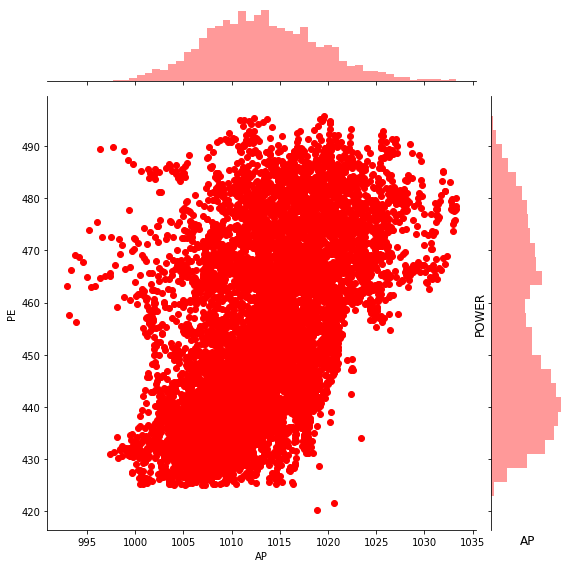

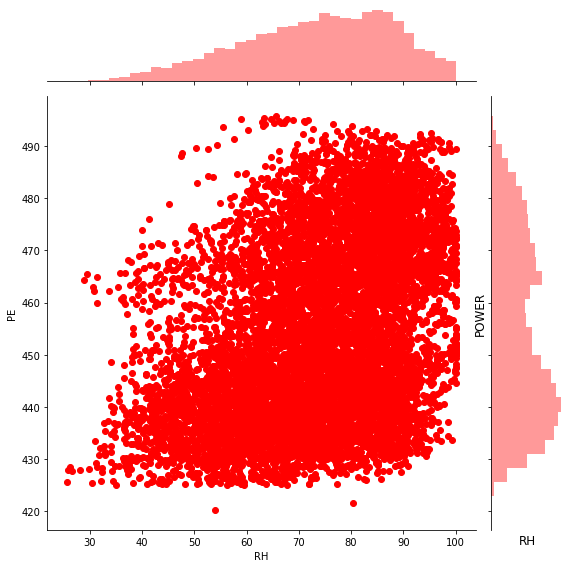

In [34]:
# Checking where the people lives more...
for i in ['AT','V','AP','RH']:
    sns.jointplot(x=i,y='PE',data=df,size=8,color='red')
    plt.ylabel('POWER',fontsize=12)
    plt.xlabel(i,fontsize=12)
    plt.show()
    sns.despine

In [35]:
#checking skewness values
df.skew()
#From below output it is clear that no skewness exist

AT   -0.136393
V     0.198521
AP    0.265445
RH   -0.431839
PE    0.306509
dtype: float64

In [39]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)
df_energy=df.loc[(z<3).all(axis=1)]
print(df_energy.shape)

(9568, 5)
(9510, 5)


AT   -0.145985
V     0.189396
AP    0.204391
RH   -0.418854
PE    0.317465
dtype: float64

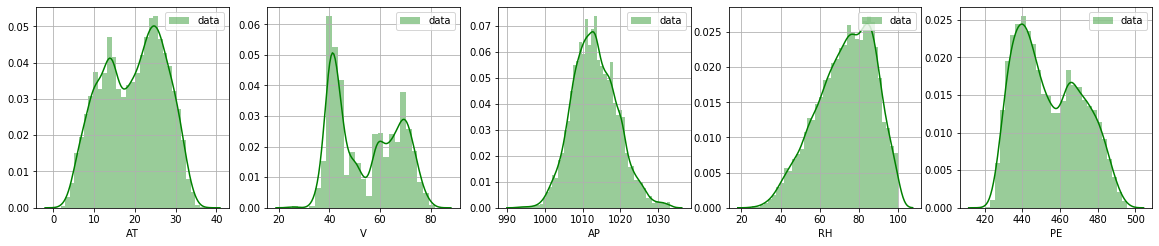

In [44]:
# Checking the Normal Distribution using distplot after removing skewness
plt.figure(figsize=(20,17))
for i,col in enumerate(list(df_energy.columns.values)):
    plt.subplot(4,5,i+1)
    sns.distplot(df[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

#lets again check the skewness after removing outliers
df_energy.skew()

In [45]:
# Checking the correlation
df_energy.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

,AT,V,AP,RH,PE
AT,1,0.84,-0.51,-0.54,-0.95
V,0.84,1,-0.42,-0.31,-0.87
AP,-0.51,-0.42,1,0.11,0.52
RH,-0.54,-0.31,0.11,1,0.39
PE,-0.95,-0.87,0.52,0.39,1


(5.0, 0.0)

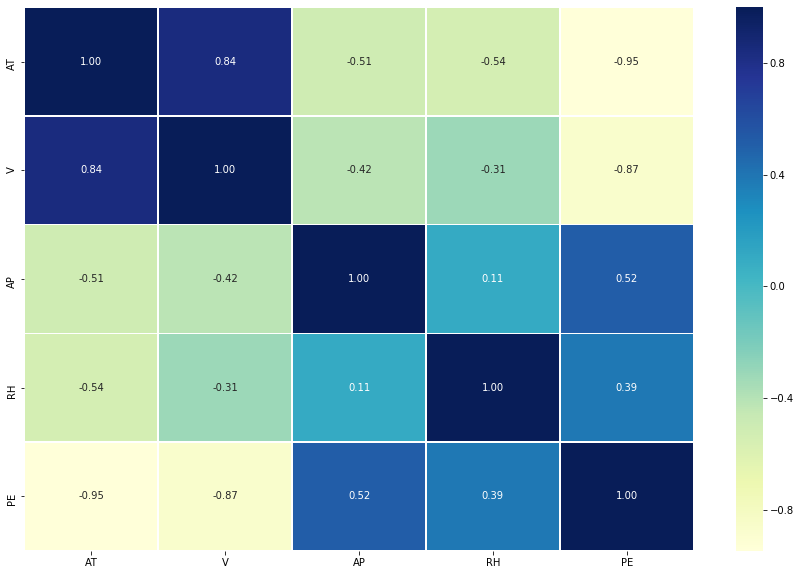

In [46]:
# Plotting Heatmap for Correlation
corr_matrix = df_energy.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Modeling


In [47]:
# Split data into X and y
X = df_energy.drop("PE", axis=1)

y = df_energy["PE"]

In [48]:
# Independent variables (no target column)
X.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [49]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

,AT,V,AP,RH
0,-0.636713,-0.992604,1.878115,-0.010608
1,0.738204,0.676596,1.182318,-0.977361
2,-1.961854,-1.178420,-0.178197,1.290976
3,0.157025,0.232526,-0.509694,0.227479
4,-1.193676,-1.328018,-0.684074,1.598361
...,...,...,...,...
9505,-0.409354,-0.368229,0.141213,1.212758
9506,-0.874835,-1.195742,1.809054,-0.449043
9507,1.564230,1.571822,-0.046980,-2.528009
9508,0.644031,1.187591,0.115315,-0.750253


In [50]:
#        Function which will find best Random State and then calculate Maximum R2_Score corresponding to it
#                                  and print R2_score in one go.
def max_random_score(regr):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr > max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to',final_r_state,'is:', max_r_score)
    return final_r_state


In [51]:
from xgboost import XGBRegressor

models = {"KNeighborsRegressor": KNeighborsRegressor(n_neighbors=18),
          "SVR": SVR(),
          "LR": LinearRegression(),
          "DecisionTreeRegressor":DecisionTreeRegressor(),
          "SVR":SVR(),
          "RandomForestRegressor":RandomForestRegressor(max_depth=2, random_state=0),
          "GradientBoostingClassifier":GradientBoostingRegressor(),
          "Lasso":Lasso(),
          "Ridge":Ridge(),
          "ElasticNet":ElasticNet(),
          "XGBRegressor":XGBRegressor()
         }
# Create a function to fit and score models
def fit_and_score(models):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        r_state=max_random_score(model)
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_train, y_train)
    return model_scores

In [52]:
model_scores = fit_and_score(models=models)

model_scores


max r2 score corresponding to 55 is: 0.9508027320042564
max r2 score corresponding to 55 is: 0.9462075528862428
max r2 score corresponding to 44 is: 0.9343199109709638
max r2 score corresponding to 43 is: 0.9406672808358774
max r2 score corresponding to 85 is: 0.8919189895140361
max r2 score corresponding to 55 is: 0.954296021831416
max r2 score corresponding to 53 is: 0.9190760560670742
max r2 score corresponding to 44 is: 0.9343077889747792
max r2 score corresponding to 66 is: 0.8657330918930934
max r2 score corresponding to 75 is: 0.9707047636698583


{'KNeighborsRegressor': 0.9498596160307303,
 'SVR': 0.9391652164923038,
 'LR': 0.9265676803602995,
 'DecisionTreeRegressor': 1.0,
 'RandomForestRegressor': 0.8865924962664378,
 'GradientBoostingClassifier': 0.9518069616785523,
 'Lasso': 0.9112060945151106,
 'Ridge': 0.9265676172836563,
 'ElasticNet': 0.8571007490966649,
 'XGBRegressor': 0.9866595084370438}

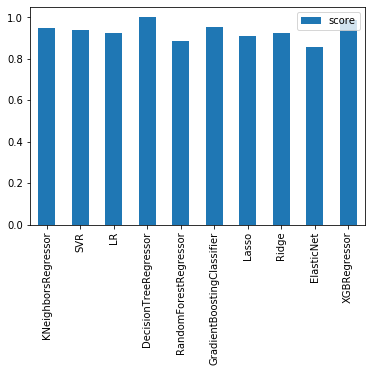

In [53]:
#Plotting bar plot of scores of various models
model_compare = pd.DataFrame(model_scores, index=["score"])
model_compare.T.plot.bar()

In [54]:
#Defining Instances For Differnt Models.
KNR=KNeighborsRegressor()
SV=SVR()
LR=LinearRegression()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ABR=AdaBoostRegressor()
LS=Lasso()
RD=Ridge()
EN=ElasticNet()
XGBRegressor=XGBRegressor()
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsRegressor',KNR))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EN))
models.append(('XGBRegressor',XGBRegressor))

Model=[]
Score=[]
R2_score=[]
cvs=[]
mae=[]
mse=[]
Rmse=[]

# Create a function to fit and score models
# Make a dictionary to keep model scores
model_r_scores = {}
# Loop through models
#   For Loop to Calculate R_2 Score, Cross Val Score.
for name, model in models:
    Model.append(name)
    print(model)
    print('\n')
    r_state=max_random_score(model)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2_scor=r2_score(y_test,y_pred)
    print('R2 Score : ',r2_scor)
    R2_score.append(r2_scor*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    Meanabsoluteerror = mean_absolute_error(y_test, y_pred)
    print('Mean absolute error=',Meanabsoluteerror)
    mae.append(Meanabsoluteerror*100)
    print('\n')
    Meansquarederror = mean_squared_error(y_test, y_pred)
    print('Mean squared error=',Meansquarederror)
    mse.append(Meansquarederror*100)
    print('\n')
    RootMeansquarederror = np.sqrt(mean_squared_error(y_test,y_pred))
    print('Root Mean squared error=',RootMeansquarederror)
    Rmse.append(RootMeansquarederror*100)
    print('\n')

        


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


max r2 score corresponding to 95 is: 0.9562678921773917
R2 Score :  0.9562678921773917


Cross_val_score= 0.9512720896181079


Mean absolute error= 2.647498422712935


Mean squared error= 12.712423501577293


Root Mean squared error= 3.565448569475837


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


max r2 score corresponding to 55 is: 0.9462075528862428
R2 Score :  0.9462075528862428


Cross_val_score= 0.9401238626259504


Mean absolute error= 3.050000043295582


Mean squared error= 15.626705432189919


Root Mean squared error= 3.9530627913290117


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


max r2 score corresponding to 44 is: 0.9343199109709638
R2 Score :  0.93

In [55]:
result=pd.DataFrame({'Model':Model,'r2_score':R2_score,'Cross_val_score':cvs,'Mean absolute error':mae,'Mean squared error':mse,'Root Mean squared error':Rmse})
result

,Model,r2_score,Cross_val_score,Mean absolute error,Mean squared error,Root Mean squared error
0,KNeighborsRegressor,95.626789,95.127209,264.749842,1271.242350,356.544857
1,SVR,94.620755,94.012386,305.000004,1562.670543,395.306279
2,LinearRegression,93.431991,92.804848,355.234825,1964.867592,443.268270
3,DecisionTreeRegressor,93.990555,92.943001,289.893270,1746.876788,417.956551
4,RandomForestRegressor,96.750429,96.280811,224.814664,944.000249,307.245871
5,GradientBoostingRegressor,95.429310,94.769775,282.882133,1327.785469,364.387907
6,AdaBoostRegressor,88.796250,89.374018,456.576360,3262.319597,571.167191
7,Lasso,91.907606,91.255041,391.575743,2386.082839,488.475469
8,Ridge,93.430779,92.804844,355.277029,1965.230230,443.309173
9,ElasticNet,86.573309,85.863073,503.381270,3910.742750,625.359317


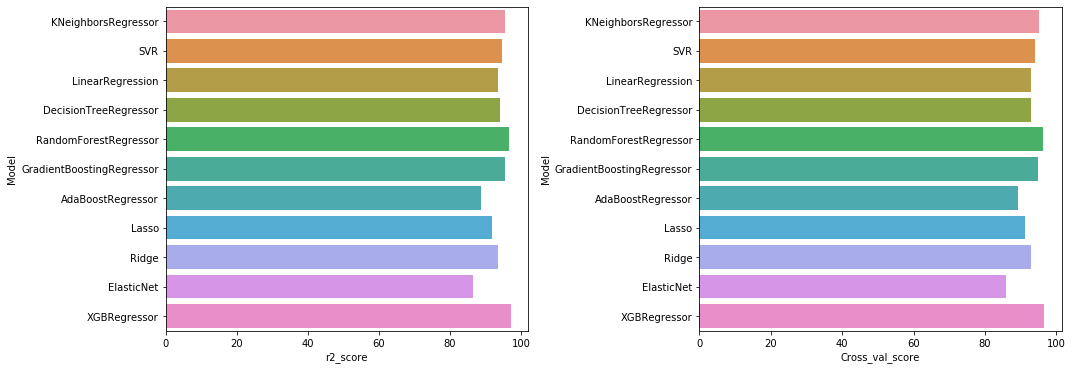

In [56]:
#Plotting bar plot of scores of various models
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'r2_score', y = 'Model', data = result)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross_val_score', y = 'Model', data = result)
plt.tight_layout()
plt.show()


In [57]:
#function to evatulate errors
def evaluate_preds(y_test, y_preds):
    """
    Performs evaluation comparison on y_test labels vs. y_pred labels.
    """
    r2score = r2_score(y_test, y_preds)
    Meanabsoluteerror = mean_absolute_error(y_test, y_preds)
    Meansquarederror = mean_squared_error(y_test, y_preds)
    RootMeansquarederror = np.sqrt(mean_squared_error(y_test,y_preds))
    metric_dict = {"r2score": round(r2score, 2),
                   "Mean absolute error": round(Meanabsoluteerror, 2),
                   "Mean squared error": round(Meansquarederror, 2), 
                   "Root Mean squared error": round(RootMeansquarederror, 2),
                   }
    print(f"r2score: {r2score * 100:.2f}%")
    print(f"Mean absolute error: {Meanabsoluteerror:.2f}")
    print(f"Mean squared error: {Meansquarederror:.2f}")
    print(f"Root Mean squared error: {RootMeansquarederror:.2f}")

    return metric_dict

# Tuning a model with GridSearchCV


In [59]:
from xgboost import XGBRegressor
#lets use gridsearchcv to find out best parameters for XGBRegressor
grid_6 = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
          "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
        "min_child_weight" : [ 1, 3, 5, 7 ],
        "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
        "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
         }
clf6 = XGBRegressor()

# Setup GridSearchCV
gs_clf6 = GridSearchCV(estimator=clf6,
                      param_grid=grid_6,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf6.fit(x_train, y_train);

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

In [60]:
# best parameters for XGBRegressor
print("Best parameter:",gs_clf6.best_params_)
print("score:",gs_clf6.best_score_)

Best parameter: {'colsample_bytree': 0.5, 'gamma': 0.3, 'learning_rate': 0.2, 'max_depth': 12, 'min_child_weight': 7}
score: 0.9638951800040463


In [61]:
#checking r2 score using best parameters which calculated from gridsearchCV
xgb=XGBRegressor(colsample_bytree= 0.5, gamma= 0.3, learning_rate= 0.2, max_depth= 12, min_child_weight= 7)
max_random_score(xgb)

max r2 score corresponding to 55 is: 0.9724600188119717


55

In [62]:
#lets use gridsearchcv to find out best parameters for RandomForestRegressor
grid5 = {'n_estimators': [100, 500, 1000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

clf = RandomForestRegressor(n_jobs=1)

# Setup GridSearchCV
gs_clf5 = GridSearchCV(estimator=clf,
                      param_grid=grid5,
                      cv=5, # 5-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf5.fit(x_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  4.1min finished


In [63]:
# best parameters for RandomForestRegressor
print("Best parameter:",gs_clf5.best_params_)
print("score:",gs_clf5.best_score_)

Best parameter: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 1000}
score: 0.960349337781573


In [64]:
#checking accuracy score using best parameters which calculated from gridsearchCV
rf=RandomForestRegressor(n_estimators=100,max_depth=None, min_samples_leaf= 1, max_features= 'sqrt',min_samples_split=4)
max_random_score(rf)

max r2 score corresponding to 44 is: 0.968872717752524


44

In [65]:
#using AdaBoostRegressor base_estimator as RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,max_depth=None, min_samples_leaf= 1, max_features= 'sqrt',min_samples_split=4)
ad=AdaBoostRegressor(base_estimator=rf)
ad.fit(x_train, y_train)
y_predrad = ad.predict(x_test)
evaluate_preds(y_test,y_predrad)


r2score: 97.00%
Mean absolute error: 2.24
Mean squared error: 9.10
Root Mean squared error: 3.02


{'r2score': 0.97,
 'Mean absolute error': 2.24,
 'Mean squared error': 9.1,
 'Root Mean squared error': 3.02}

# After all this process conclusion is that XGBRegressor is performing well.

In [67]:
#lets make our final model
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.20,random_state=55)
xgb=XGBRegressor(colsample_bytree= 0.5, gamma= 0.3, learning_rate= 0.2, max_depth= 12, min_child_weight= 7)
xgb.fit(x_train, y_train)
y_predxgb = xgb.predict(x_test)
evaluate_preds(y_test,y_predxgb)


r2score: 97.25%
Mean absolute error: 2.08
Mean squared error: 8.00
Root Mean squared error: 2.83


{'r2score': 0.97,
 'Mean absolute error': 2.08,
 'Mean squared error': 8.0,
 'Root Mean squared error': 2.83}

Text(0, 0.5, 'Predicted Y')

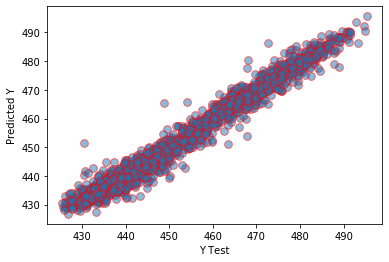

In [68]:
#plot of Y Test and Predicted Y
plt.scatter(x=y_test,y=y_predxgb,marker="o",edgecolors ="r",s=60,alpha=0.5)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


Getting linear relatipnship means that our model performes well.


In [69]:
# Printing predicted values
df1 = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_predxgb})

df1
# On the lest side values are those fields which are taken by machine for test...

,actual values,predictions
8425,471.32,470.080780
4523,471.47,475.441162
3711,453.20,456.573761
4622,455.07,454.618622
2040,436.37,436.587616
...,...,...
6794,444.90,447.957397
2595,439.25,439.581360
7301,438.46,437.259430
4331,471.28,465.343201


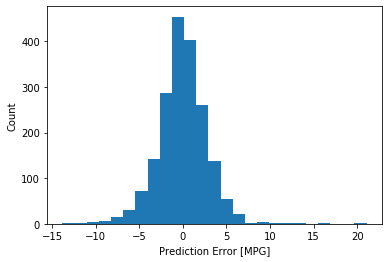

In [70]:
#lets visualize the error
error = y_predxgb - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [72]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(y_predxgb)
df1.to_csv('Project14_Cobined_cycle_submission.csv',index=False)

In [73]:
# Find feature importance of our best model
xgb.feature_importances_

array([0.82870275, 0.09349363, 0.06648409, 0.01131949], dtype=float32)

In [74]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:80])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

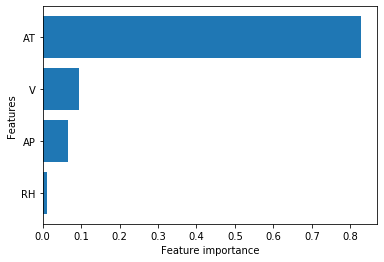

In [75]:
#bar plot of important features 
plot_features(x_train.columns, xgb.feature_importances_)

Looks like weight contribute the most in mpg dataset.

In [78]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(xgb,'Project14_Cobined_cycle_submission.pkl')

['Project14_Cobined_cycle_submission.pkl']

In [79]:
#read the file using joblib
xgb_from_joblib=joblib.load('Project14_Cobined_cycle_submission.pkl')
joblib_y_preds = xgb_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

r2score: 97.25%
Mean absolute error: 2.08
Mean squared error: 8.00
Root Mean squared error: 2.83


{'r2score': 0.97,
 'Mean absolute error': 2.08,
 'Mean squared error': 8.0,
 'Root Mean squared error': 2.83}

# Conclusion